# 대기정보분석자료를 다양하게 표현하기

선생님은 대기정보 분석자료를 Airkorea에서 다운 받았습니다. 그리고 다양한 표현 방법을 통해 자료를 가공하고자 합니다.

## 1.자료 읽어오기

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pda
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기(pandas활용)
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

#pandas는 5줄만 미리보는  head()를 제공합니다.
data.head()

,날짜,PM10,PM2.5,오존,이산화질소,일산화탄소,아황산가스
0,2018-08-25,23.0,12.0,0.037,0.021,0.4,0.003
1,2018-08-24,8.0,4.0,0.021,0.016,0.3,0.002
2,2018-08-23,13.0,7.0,0.010,0.019,0.3,0.003
3,2018-08-22,20.0,12.0,0.031,0.030,0.4,0.003
4,2018-08-21,21.0,11.0,0.030,0.024,0.4,0.003


## 산포도로 표현하기

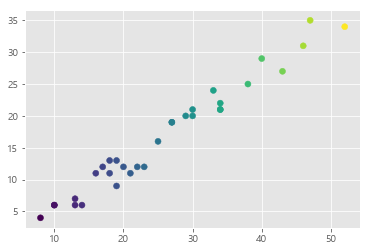

In [31]:
import csv
import matplotlib.pyplot as plt
import numpy as np
#데이터 읽기
f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)
#리스트 만들기
pm10=[]
pm25=[]
#자료수집하기
for row in data:
    if row[-6]!='PM10' and row[-6]!='':
        pm10.append(int(row[-6]))
        pm25.append(int(row[-5]))        
#산포도 그리기
colormap=pm10 #colormap으로 색상 지정하기
plt.scatter(pm10, pm25,c=colormap)
plt.show()

## 선형회귀분석(1차함수)로 관계성 파악하기

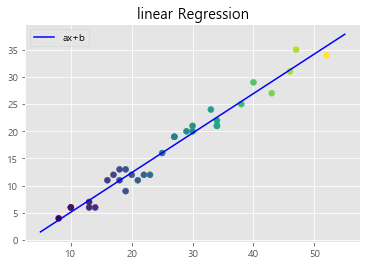

y = 0.726904376012966 x + -2.1353322528363066


In [33]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)

pm10=[]
pm25=[]

for row in data:
    if row[-6]!='PM10' and row[-6]!='':
        pm10.append(int(row[-6]))
        pm25.append(int(row[-5]))
        
#자료의 평균을 구하기(numpy라는 모듈을 활용)
mx=np.mean(pm10)
my=np.mean(pm25)

#분모구하기
divisor=sum([(mx-x)**2 for x in pm10])

#분자구하는 함수설정
def top(x, mx, y, my):
    d=0
    for i in range (len(x)):
        d+=(x[i]-mx)*(y[i]-my)
    return d

#분자구하기
dividend=top(pm10, mx,pm25,my)

#일차함수의 성분구하기
a=dividend/divisor
b=my-(mx*a)
x=np.linspace(5,55)

#그래프 꾸미기
colormap=pm10 #colormap으로 색상 지정하기
plt.scatter(pm10, pm25,c=colormap)
plt.plot(x, a*x+b, label='ax+b', color='b')
plt.grid(True)
plt.title('linear Regression')
plt.legend()
plt.show()
print( 'y','=', a,"x",'+', b)

## 꺽은 선 그래프로 그리기

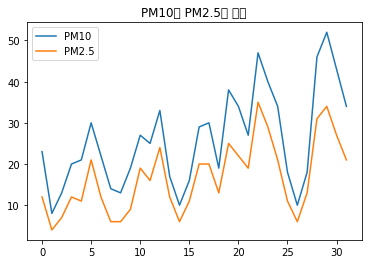

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
#데이터 읽기
f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)
#리스트 만들기

pm10=[]
pm25=[]
date=[]
#자료수집하기
for row in data:
    if row[-6]!='PM10' and row[-6]!='':
        date.append(row[0])
        pm10.append(int(row[-6]))
        pm25.append(int(row[-5]))        
#꺽은선 그리기
plt.bar(pm10, label='PM10')
plt.plot(pm25, label='PM2.5')
plt.title("PM10과 PM2.5의 비교")
plt.legend()
plt.show()

## bar로 표현하기

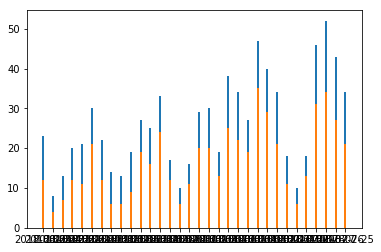

In [13]:
import csv
import matplotlib.pyplot as plt
import numpy as np
#데이터 읽기
f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)
#리스트 만들기
pm10=[]
pm25=[]
date=[]
#자료수집하기
for row in data:
    if row[-6]!='PM10' and row[-6]!='':
        date.append(row[0])
        pm10.append(int(row[-6]))
        pm25.append(int(row[-5]))         
#bar 그리기
plt.bar(date, pm10, width=0.2)
plt.bar(date, pm25, width=0.2)
plt.show()

## 히스토그램으로 표현하기

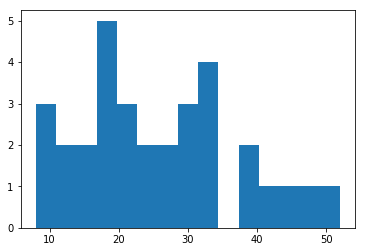

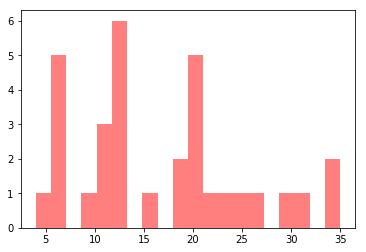

In [25]:
import csv
import matplotlib.pyplot as plt
import numpy as np
#데이터 읽기
f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)
#리스트 만들기
pm10=[]
pm25=[]
date=[]
#자료수집하기
for row in data:
    if row[-6]!='PM10' and row[-6]!='':
        date.append(row[0])
        pm10.append(int(row[-6]))
        pm25.append(int(row[-5]))         
#bar 그리기
plt.hist(pm10, bins=15)
plt.show()
plt.hist(pm25, bins=20, color='red', alpha=0.5)#bins로 구간의 갯수를 정하고, color로 색상지정을 지정함. alpha는 투명도를 의미함. 
plt.show()

## 상자수염으로 표현하기(box)

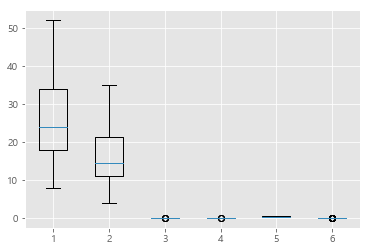

In [19]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)

r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
r6=[]

for row in data:
    if row[0]!=''and row[0]!='날짜':
        r1.append(float(row[1]))
        r2.append(float(row[2]))
        r3.append(float(row[3]))
        r4.append(float(row[4]))
        r5.append(float(row[5]))
        r6.append(float(row[6]))
plt.boxplot([r1, r2, r3, r4, r5, r6])
plt.show()

## 상자수염 꾸며보기

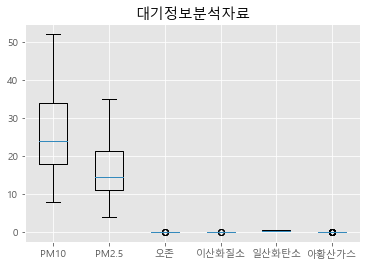

<Figure size 1800x1200 with 0 Axes>

In [27]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)

r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
r6=[]

for row in data:
    if row[0]!=''and row[0]!='날짜':
        r1.append(float(row[1]))
        r2.append(float(row[2]))
        r3.append(float(row[3]))
        r4.append(float(row[4]))
        r5.append(float(row[5]))
        r6.append(float(row[6]))
plt.boxplot([r1, r2, r3, r4, r5, r6], labels=['PM10', 'PM2.5', '오존', '이산화질소','일산화탄소', '아황산가스'])
plt.title('대기정보분석자료')
plt.figure(figsize=(6,4), dpi=300)
plt.show()

## 상자수염 나누어서 그리기

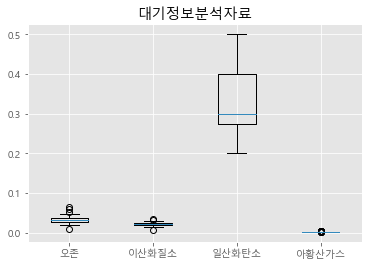

<Figure size 1800x1200 with 0 Axes>

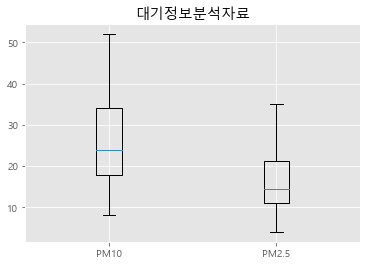

<Figure size 1800x1200 with 0 Axes>

In [30]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f=open('대기정보측정자료_180825.csv')
data=csv.reader(f)

r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
r6=[]

for row in data:
    if row[0]!=''and row[0]!='날짜':
        r1.append(float(row[1]))
        r2.append(float(row[2]))
        r3.append(float(row[3]))
        r4.append(float(row[4]))
        r5.append(float(row[5]))
        r6.append(float(row[6]))
plt.boxplot([r3, r4, r5, r6], labels=['오존', '이산화질소','일산화탄소', '아황산가스'])
plt.title('대기정보분석자료')
plt.figure(figsize=(6,4), dpi=300)
plt.show()
plt.boxplot([r1,r2], labels=['PM10', 'PM2.5'])
plt.title('대기정보분석자료')
plt.figure(figsize=(6,4), dpi=300)
plt.show()

# (pandas)수평바 그리기

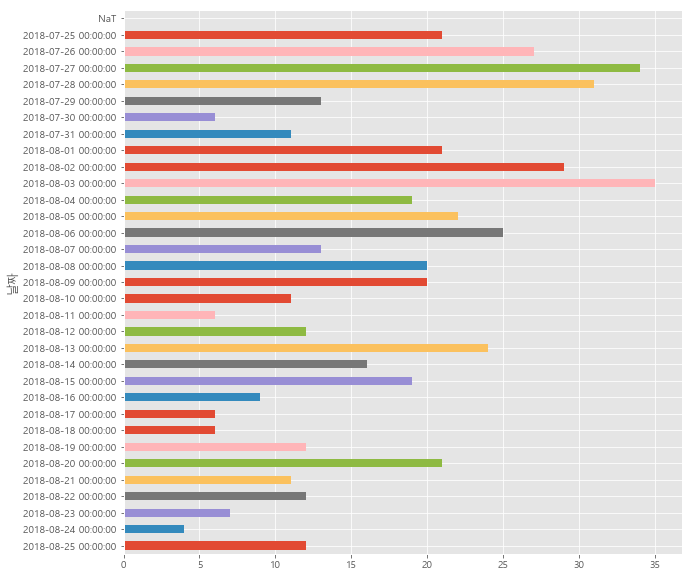

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')

#날짜기준으로 자료정렬
data=pd.read_csv(f,index_col=0, parse_dates=['날짜'])

#수평바그리기
data['PM2.5'].plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

# (pandas)정렬해서 수평바 그리기

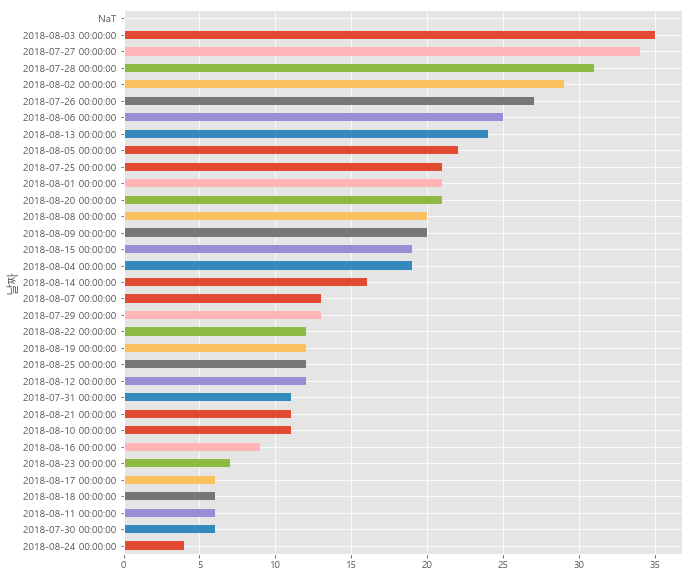

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pda
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825a.csv')
data=pd.read_csv(f,index_col=0, parse_dates=['날짜'])

data['PM2.5'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

# (pandas)산포도로 나타내기

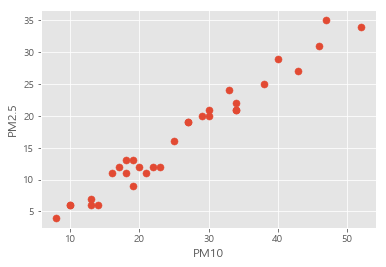

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

plt.scatter(data['PM10'],data['PM2.5'], s=50)
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.show()

# (pandas)x축에 따라 색상지정하기

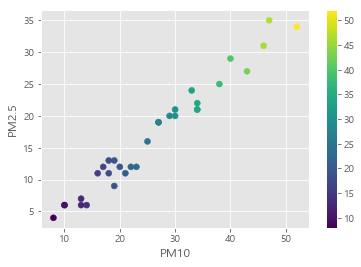

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

colormap=data['PM10']
plt.scatter(data['PM10'],data['PM2.5'],c=colormap)
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.colorbar()
plt.show()

# (seaborn)선형회귀(sesborn으로 해결)

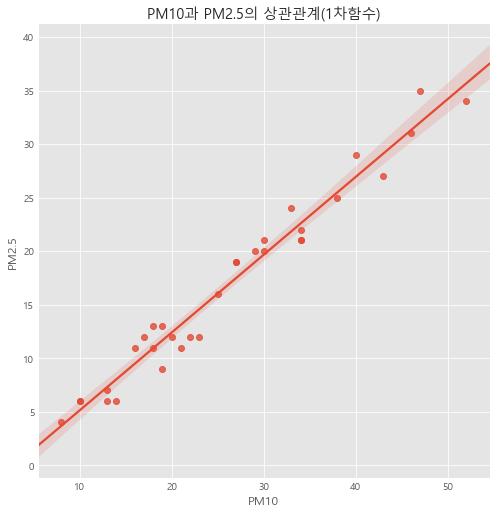

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)


sns.lmplot(x='PM10', y='PM2.5', data=data, palette='Set1', size=7)
plt.title('PM10과 PM2.5의 상관관계(1차함수)')
plt.show()



# (seaborn)히트맵을 통해 상관계수를 분석하기

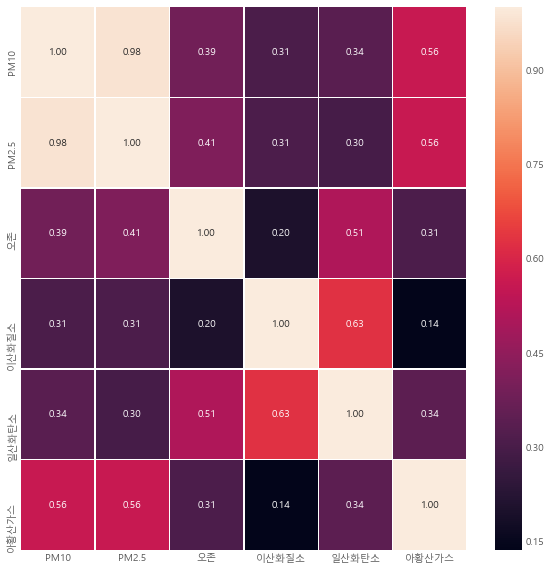

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show()